# 1. Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from scipy import stats

In [2]:
sns.set_theme(style='whitegrid')

In [3]:
df = pd.read_csv('IE - Marketing Intelligence - Individual Assignment Dataset.csv', parse_dates=['Date'], index_col='Date', dayfirst=True)
df.head()

,Channel,Device Category,Age,Gender,Users,Sessions,Pageviews,Bounces,Time on Page,Leads
Date,,,,,,,,,,
2017-05-22,Direct,desktop,25-34,female,2380,5605,150245,213,3805044,3
2017-01-23,Direct,desktop,25-34,female,2331,5614,152653,184,3907392,9
2017-01-16,Direct,desktop,25-34,female,2304,5630,152127,202,3903055,6
2017-05-30,Direct,desktop,25-34,female,2302,5295,128093,213,3326628,5
2017-05-08,Direct,desktop,25-34,female,2298,5107,137228,238,3558793,12


# 2. Data Cleaning and Feature Engineering

Firtsly, I did a basic exploration of the data.

In [4]:
df.describe()

,Users,Sessions,Pageviews,Bounces,Time on Page,Leads
count,58295.000000,58295.000000,58295.000000,58295.000000,5.829500e+04,58295.000000
mean,132.971370,210.343906,3079.615936,55.500918,8.219082e+04,3.152792
std,213.958958,418.932734,9422.232811,75.627342,2.483394e+05,5.499156
min,10.000000,9.000000,9.000000,0.000000,0.000000e+00,0.000000
25%,22.000000,28.000000,110.000000,11.000000,3.615000e+03,0.000000
50%,53.000000,71.000000,401.000000,25.000000,1.235700e+04,1.000000
75%,148.000000,196.000000,1515.000000,73.000000,4.262450e+04,4.000000
max,2380.000000,5630.000000,173810.000000,2281.000000,4.342735e+06,83.000000


In [5]:
df.dtypes

Channel            object
Device Category    object
Age                object
Gender             object
Users               int64
Sessions            int64
Pageviews           int64
Bounces             int64
Time on Page        int64
 Leads              int64
dtype: object

In [6]:
df.shape

(58295, 10)

In [7]:
enc = OneHotEncoder(sparse=False)

In [8]:
df['Gender'].value_counts()

female    30880
male      27415
Name: Gender, dtype: int64

In [9]:
df['Channel'].value_counts()

Organic Search    11993
(Other)           11926
Direct            11529
Paid Search       10976
Display            5805
Referral           3970
Social             2014
Email                82
Name: Channel, dtype: int64

In [10]:
sex = pd.DataFrame(enc.fit_transform(df[['Gender']]), columns=list(df['Gender'].unique())).set_axis(df.index)
channels = pd.DataFrame(enc.fit_transform(df[['Channel']]), columns=list(df['Channel'].unique())).set_axis(df.index)
devices = pd.DataFrame(enc.fit_transform(df[['Device Category']]), columns=list(df['Device Category'].unique())).set_axis(df.index)
ages = pd.DataFrame(enc.fit_transform(df[['Age']]), columns=list(df['Age'].unique())).set_axis(df.index)

I encoded some varibales to fit them in a correct format for the machine learning model.

In [11]:
df1 = pd.concat([df, sex, ages, devices, channels], axis=1).drop(columns=['Channel', 'Device Category', 'Age', 'Gender'])
df1

,Users,Sessions,Pageviews,Bounces,Time on Page,Leads,female,male,25-34,35-44,...,mobile,tablet,Direct,Organic Search,Display,Paid Search,Social,(Other),Email,Referral
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-22,2380,5605,150245,213,3805044,3,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-23,2331,5614,152653,184,3907392,9,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-16,2304,5630,152127,202,3903055,6,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-30,2302,5295,128093,213,3326628,5,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-08,2298,5107,137228,238,3558793,12,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,10,10,10,9,6,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-01-31,10,16,230,2,9058,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-01-31,10,12,34,5,475,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Lets see the distribution of the variables without any previous transformation.

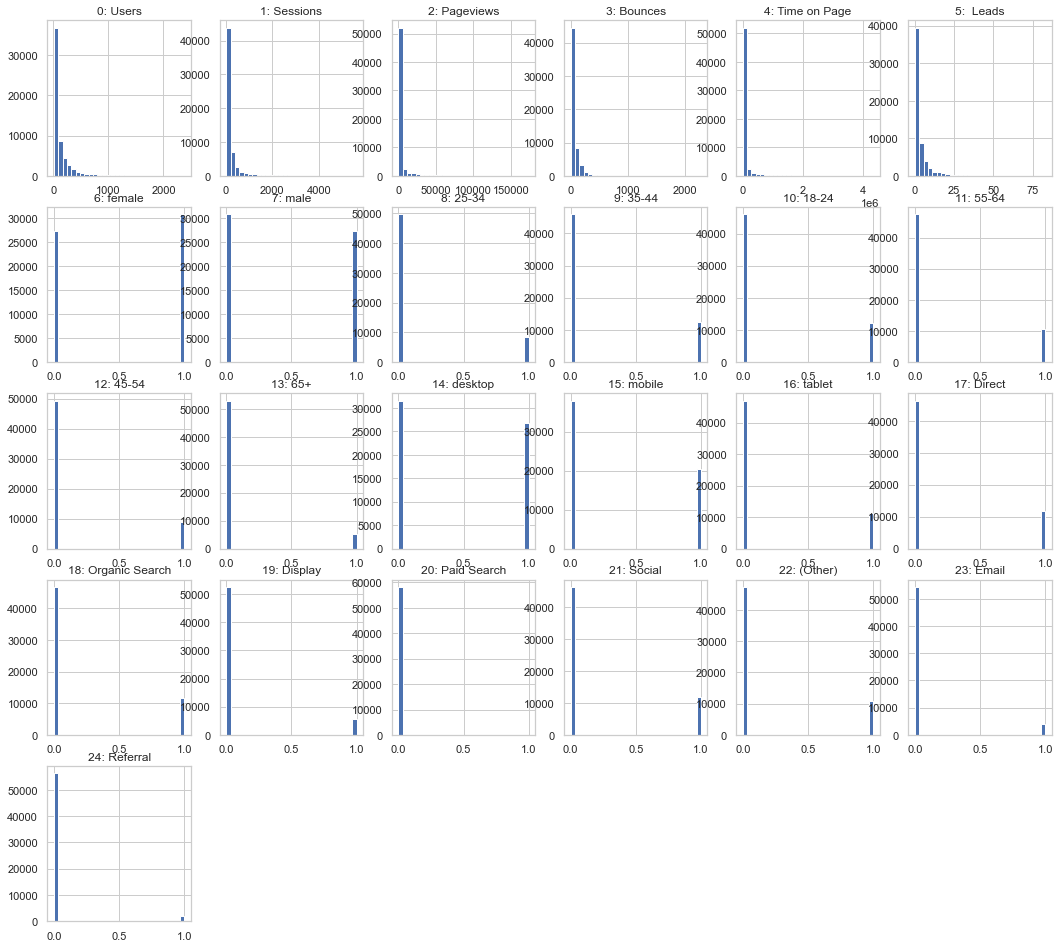

In [12]:
fig, axes = plt.subplots(6, 6, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i >df1.shape[1]-1:
        ax.set_visible(False)
        continue
    ax.hist(df1.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, df1.columns[i]))

C:\Users\ghopk\AppData\Local\Temp\ipykernel_14752\796667982.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


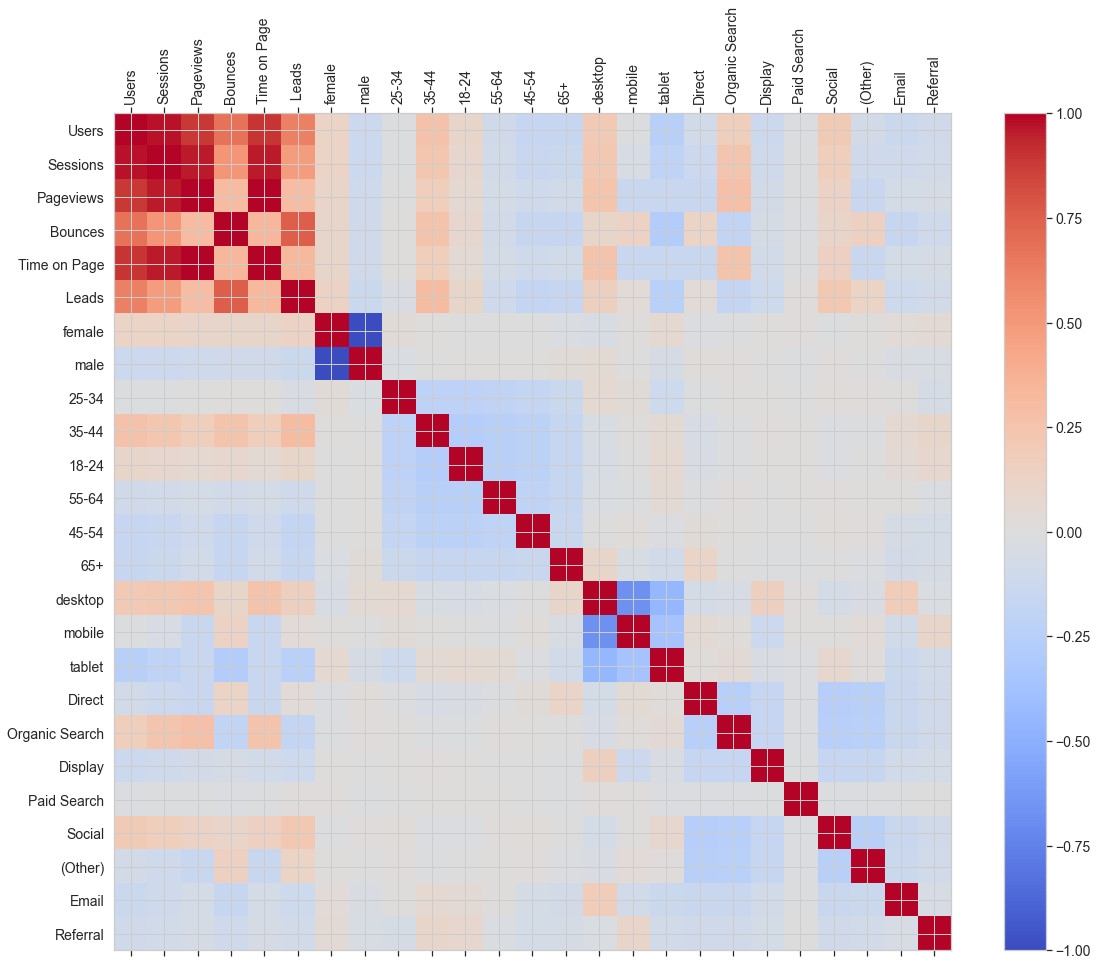

In [13]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=90)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [14]:
df1.head()

,Users,Sessions,Pageviews,Bounces,Time on Page,Leads,female,male,25-34,35-44,...,mobile,tablet,Direct,Organic Search,Display,Paid Search,Social,(Other),Email,Referral
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-22,2380,5605,150245,213,3805044,3,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-23,2331,5614,152653,184,3907392,9,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-16,2304,5630,152127,202,3903055,6,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-30,2302,5295,128093,213,3326628,5,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-08,2298,5107,137228,238,3558793,12,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df2 = df1.copy()

In [16]:
df2['Sessions/Users'] = df1['Sessions'] / df1['Users']
df2['PageViews/Sessions'] = df1['Pageviews'] / df1['Sessions']
df2['Bounces/Sessions per 1000'] = df1['Bounces'] / df1['Sessions'] * 1000
df2['Time/Sessions'] = df1['Time on Page'] / df1['Sessions']
df2['Leads/Sessions per 1000'] = df1[' Leads'] / df1['Sessions'] * 1000
df2.drop(columns=['Sessions', 'Pageviews', 'Bounces', 'Time on Page'], inplace=True)
df2.head()

,Users,Leads,female,male,25-34,35-44,18-24,55-64,45-54,65+,...,Paid Search,Social,(Other),Email,Referral,Sessions/Users,PageViews/Sessions,Bounces/Sessions per 1000,Time/Sessions,Leads/Sessions per 1000
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-22,2380,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.355042,26.805531,38.001784,678.866012,0.535236
2017-01-23,2331,9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.408408,27.191486,32.775205,696.008550,1.603135
2017-01-16,2304,6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.443576,27.020782,35.879218,693.260213,1.065719
2017-05-30,2302,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.300174,24.191313,40.226629,628.258357,0.944287
2017-05-08,2298,12,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.222367,26.870570,46.602702,696.846094,2.349716


In [17]:
df2.corr()[' Leads']

Users                        0.610900
 Leads                       1.000000
female                       0.125728
male                        -0.125728
25-34                       -0.037297
35-44                        0.301316
18-24                        0.096503
55-64                       -0.108462
45-54                       -0.172452
65+                         -0.156314
desktop                      0.153114
mobile                       0.034646
tablet                      -0.235137
Direct                       0.033289
Organic Search              -0.175736
Display                     -0.115948
Paid Search                  0.008862
Social                       0.216858
(Other)                      0.122068
Email                       -0.114299
Referral                    -0.085585
Sessions/Users              -0.002395
PageViews/Sessions          -0.025248
Bounces/Sessions per 1000   -0.000537
Time/Sessions                0.045313
Leads/Sessions per 1000      0.334826
Name:  Leads

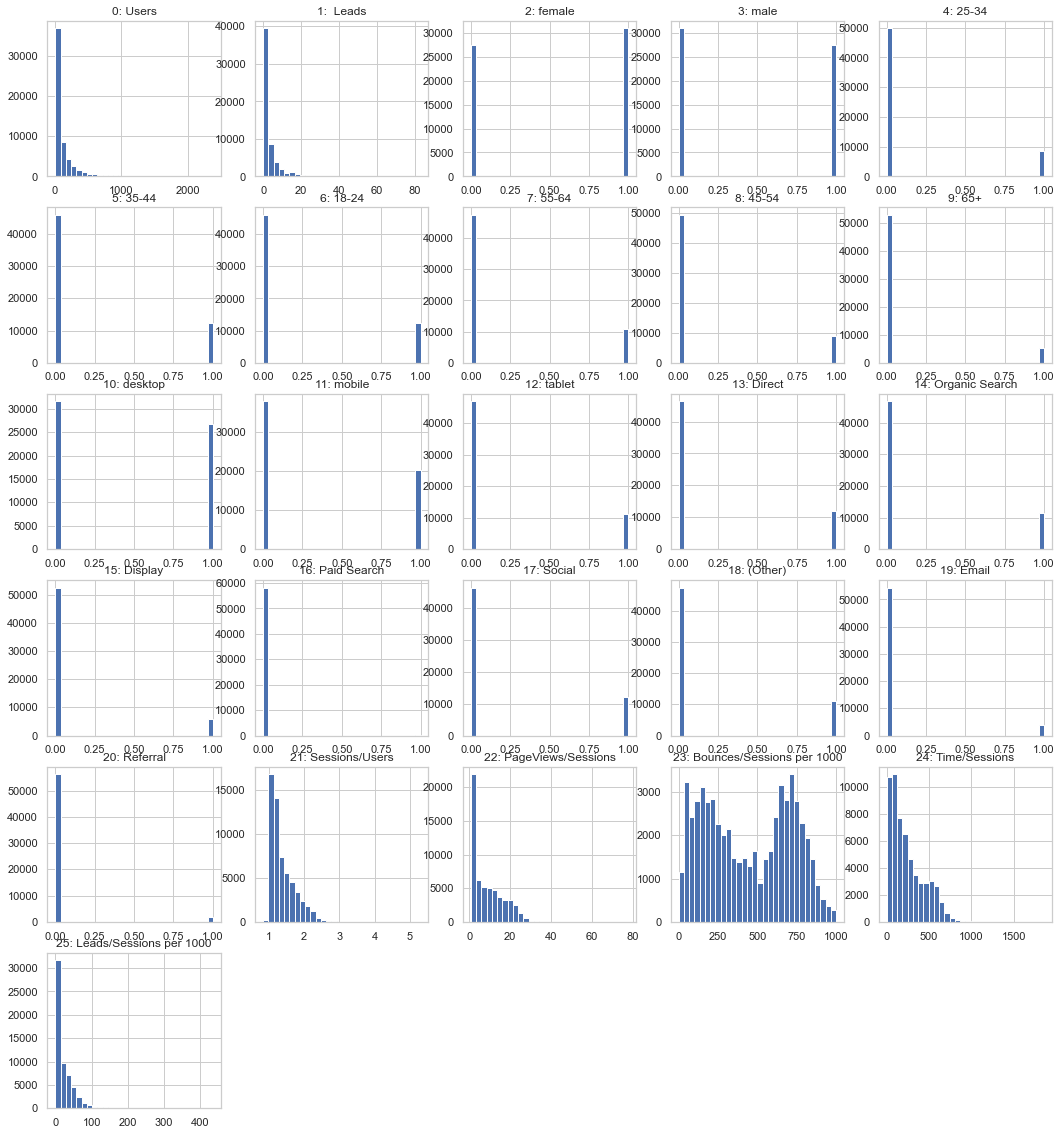

In [18]:
fig, axes = plt.subplots(6, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i >df2.shape[1]-1:
        ax.set_visible(False)
        continue
    ax.hist(df2.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, df2.columns[i]))

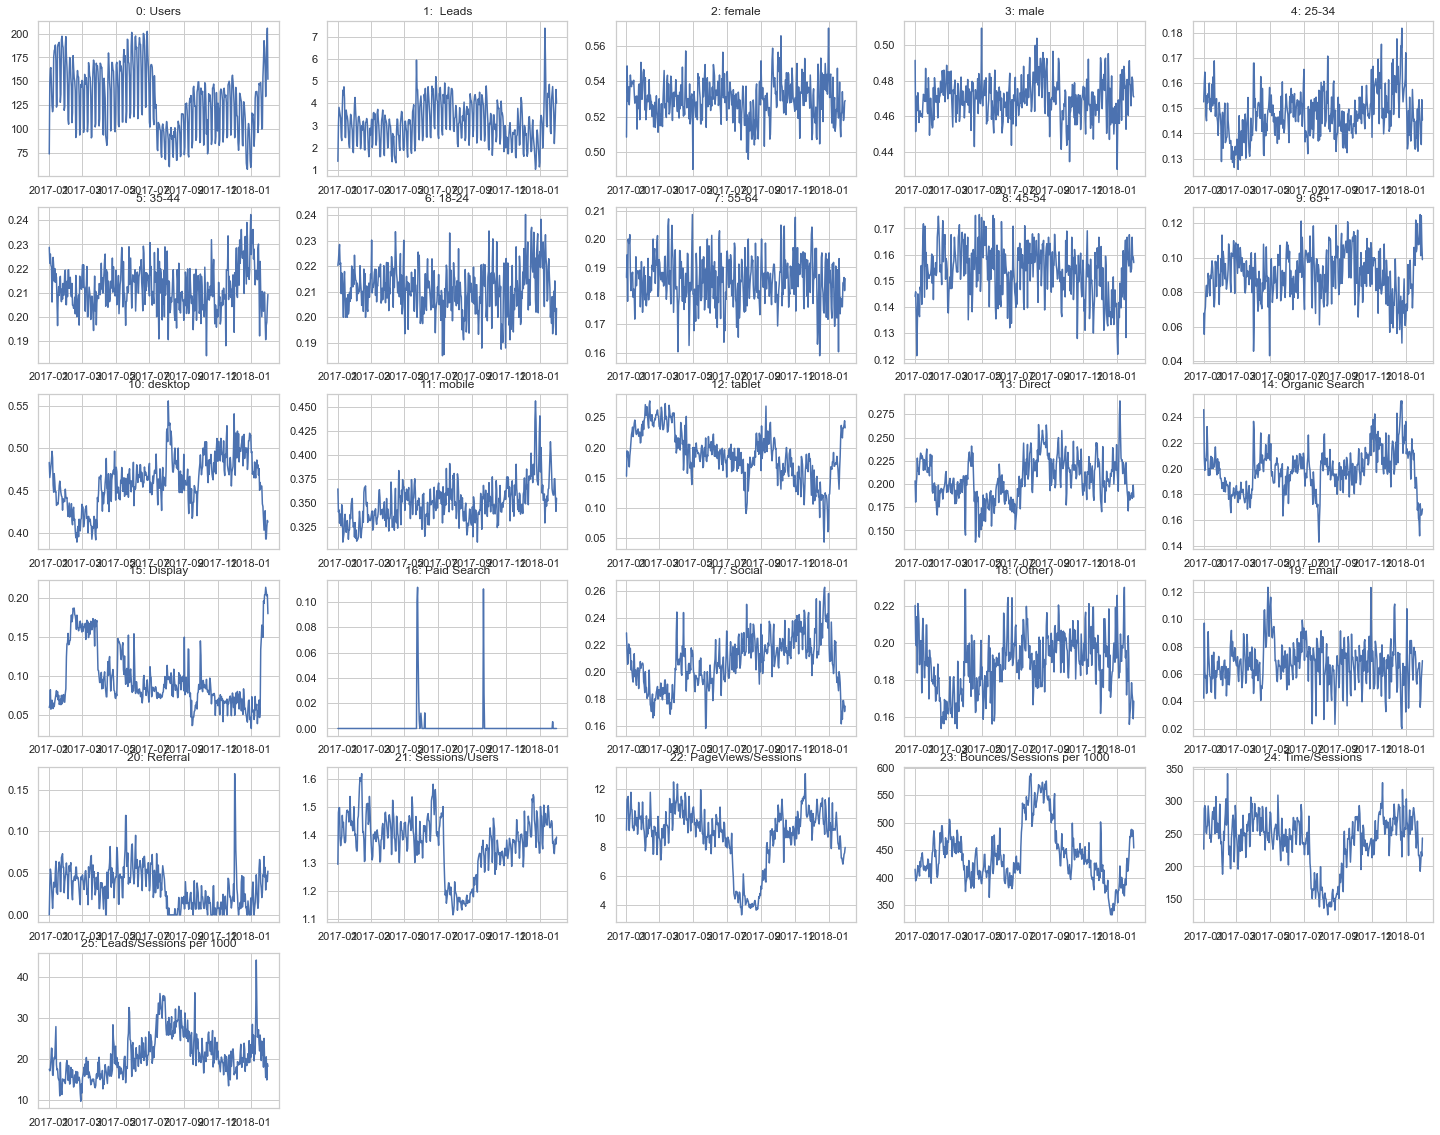

In [19]:
fig, axes = plt.subplots(6, 5, figsize=(25, 20))
for i, ax in enumerate(axes.ravel()):
    if i >df2.shape[1]-1:
        ax.set_visible(False)
        continue
    ax.plot(df2.iloc[:, i].resample('D').mean())
    ax.set_title("{}: {}".format(i, df2.columns[i]))

Text(0.5, 1.0, 'Total number of leads per month')

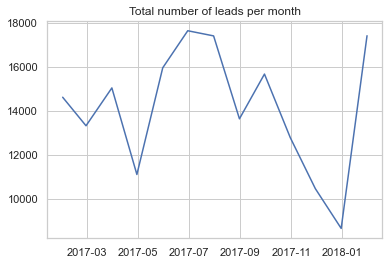

In [20]:
#plt.figure(figsize=(15,8))
plt.plot(df2[' Leads'].resample('M').sum())
plt.title('Total number of leads per month')

Text(0.5, 1.0, 'Proportion of Paid Search connections')

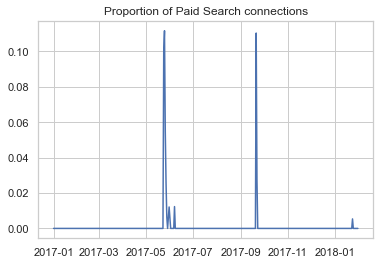

In [21]:
#plt.figure(figsize=(15,8))
plt.plot(df2['Paid Search'].resample('D').mean())
plt.title('Proportion of Paid Search connections')

Text(0, 0.5, 'Mobile')

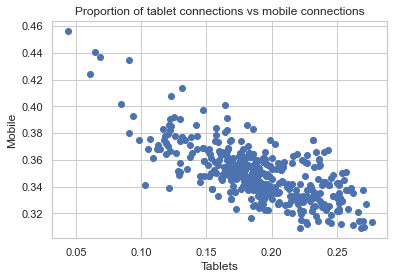

In [22]:
#plt.figure(figsize=(15,8))
plt.scatter(df2['tablet'].resample('D').mean(), df2['mobile'].resample('D').mean())
plt.title('Proportion of tablet connections vs mobile connections')
plt.xlabel('Tablets')
plt.ylabel('Mobile')

Text(0.5, 1.0, 'Percentage of connections through Organic Search')

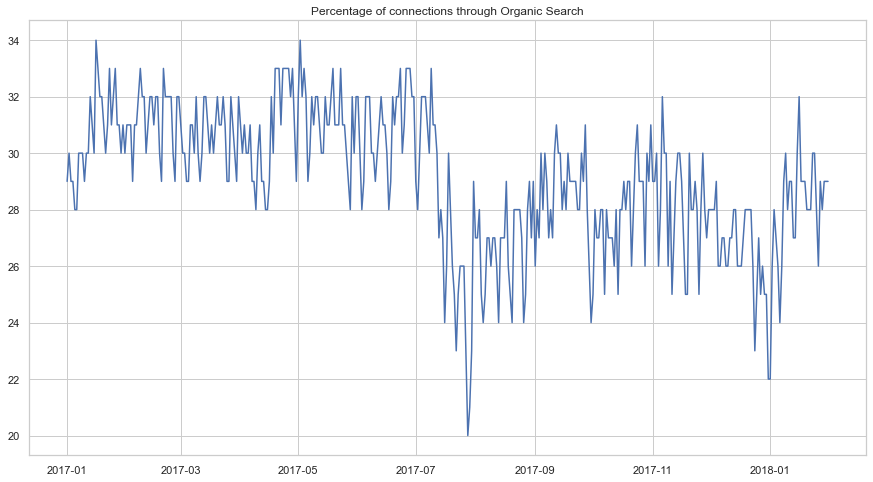

In [23]:
plt.figure(figsize=(15,8))
plt.plot(df2['Organic Search'].resample('D').sum())
plt.title('Percentage of connections through Organic Search')

In [24]:
df2.head()

,Users,Leads,female,male,25-34,35-44,18-24,55-64,45-54,65+,...,Paid Search,Social,(Other),Email,Referral,Sessions/Users,PageViews/Sessions,Bounces/Sessions per 1000,Time/Sessions,Leads/Sessions per 1000
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-22,2380,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.355042,26.805531,38.001784,678.866012,0.535236
2017-01-23,2331,9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.408408,27.191486,32.775205,696.008550,1.603135
2017-01-16,2304,6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.443576,27.020782,35.879218,693.260213,1.065719
2017-05-30,2302,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.300174,24.191313,40.226629,628.258357,0.944287
2017-05-08,2298,12,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.222367,26.870570,46.602702,696.846094,2.349716


C:\Users\ghopk\AppData\Local\Temp\ipykernel_14752\1360601240.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


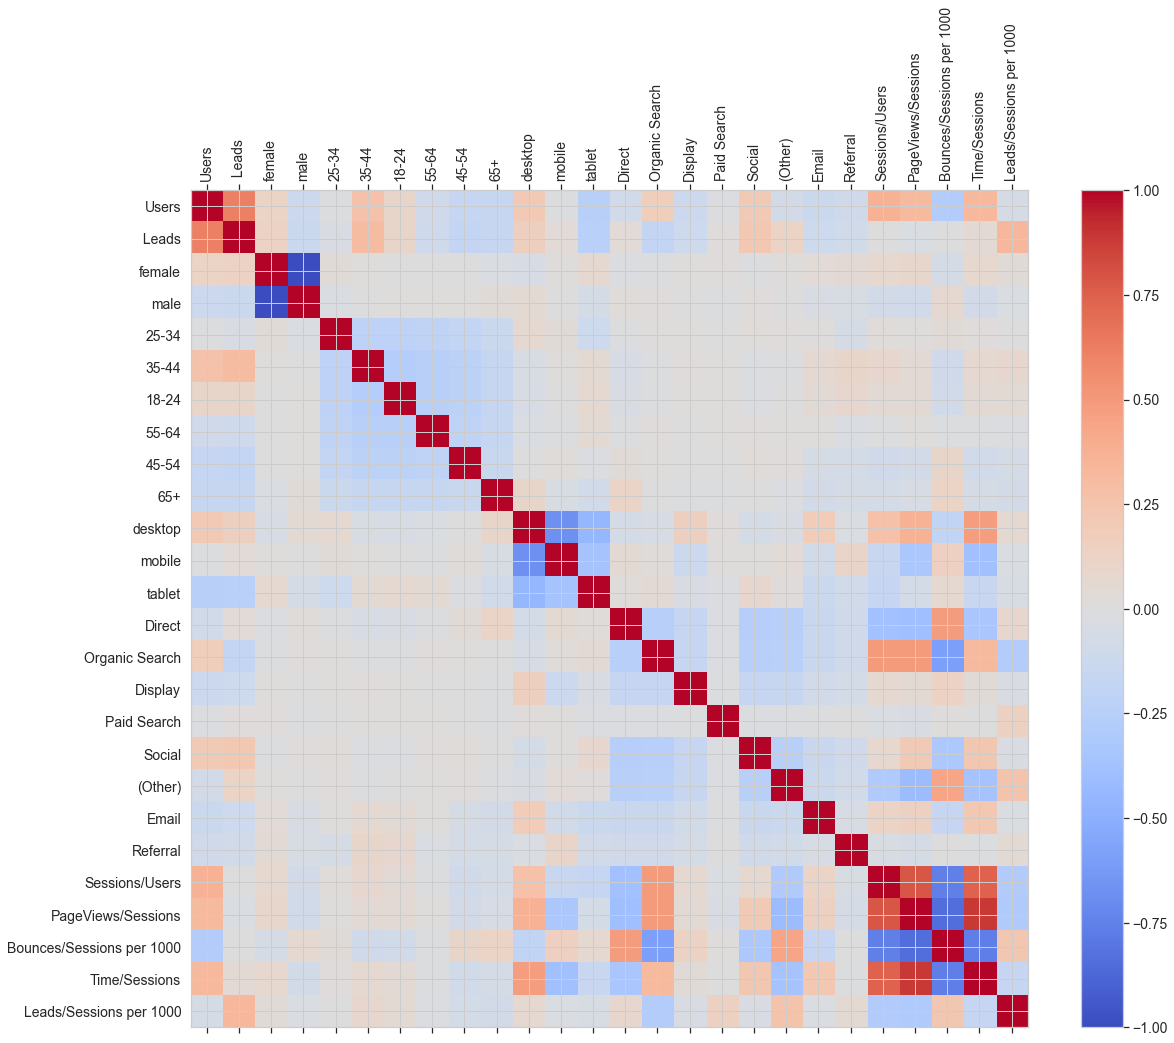

In [25]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=90)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [26]:
(df.groupby('Channel')[' Leads'].sum()/df.groupby('Channel')[' Leads'].sum().sum())

Channel
(Other)           0.228002
Direct            0.075678
Display           0.039022
Email             0.001986
Organic Search    0.358628
Paid Search       0.271519
Referral          0.017879
Social            0.007285
Name:  Leads, dtype: float64

Text(0.5, 1.0, 'Leads by Channel')

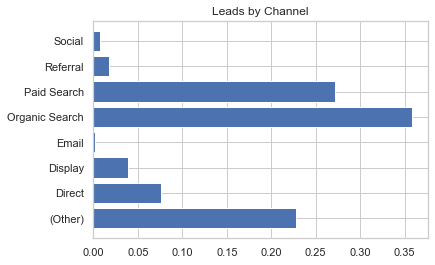

In [27]:
plt.barh(list(df.groupby('Channel')[' Leads'].sum().index), df.groupby('Channel')[' Leads'].sum()/df.groupby('Channel')[' Leads'].sum().sum())
plt.title('Leads by Channel')

In [28]:
 df.groupby('Device Category')[' Leads'].sum()/df.groupby('Device Category')[' Leads'].sum().sum()

Device Category
desktop    0.591250
mobile     0.377595
tablet     0.031155
Name:  Leads, dtype: float64

Text(0.5, 1.0, 'Leads by Device')

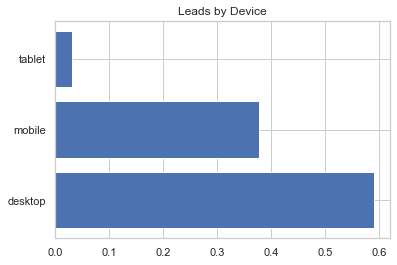

In [29]:
plt.barh(list(df.groupby('Device Category')[' Leads'].sum().index), df.groupby('Device Category')[' Leads'].sum()/df.groupby('Device Category')[' Leads'].sum().sum())
plt.title('Leads by Device')

In [30]:
df.groupby('Age')[' Leads'].sum()/df.groupby('Age')[' Leads'].sum().sum()

Age
18-24    0.124119
25-34    0.426678
35-44    0.279539
45-54    0.111882
55-64    0.045290
65+      0.012492
Name:  Leads, dtype: float64

Text(0.5, 1.0, 'Leads by Age')

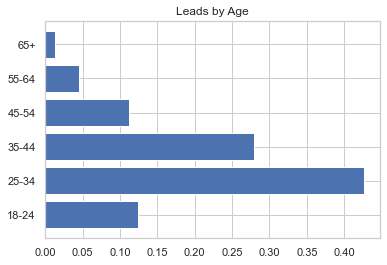

In [31]:
plt.barh(list(df.groupby('Age')[' Leads'].sum().index), df.groupby('Age')[' Leads'].sum()/df.groupby('Age')[' Leads'].sum().sum())
plt.title('Leads by Age')

Text(0.5, 1.0, 'Leads by Gender')

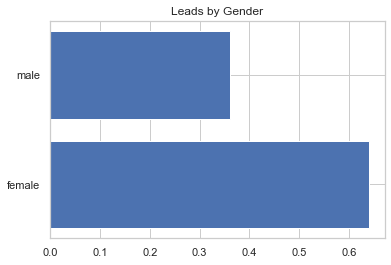

In [32]:
plt.barh(list(df.groupby('Gender')[' Leads'].sum().index), df.groupby('Gender')[' Leads'].sum()/df.groupby('Gender')[' Leads'].sum().sum())
plt.title('Leads by Gender')

In [33]:
df.groupby('Gender')[' Leads'].sum()/df.groupby('Gender')[' Leads'].sum().sum()

Gender
female    0.639174
male      0.360826
Name:  Leads, dtype: float64

In [34]:
df3 = df2.copy()
df3['Users_log'] = np.log(df2['Users'] + 1)
df3['Leads_log'] = np.log(df2[' Leads'] + 1)
df3['Time/Sessions_log'] = np.log(df2['Time/Sessions'] + 1)
df3['PageViews/Sessions_log'] = np.log(df2['PageViews/Sessions'] + 1)
df3['Leads/Sessions per 1000_log'] = np.log(df2['Leads/Sessions per 1000'] + 1)
df3.drop(columns=['Users', ' Leads', 'PageViews/Sessions', 'Time/Sessions', 'Leads/Sessions per 1000'], inplace=True)
df3.head()

,female,male,25-34,35-44,18-24,55-64,45-54,65+,desktop,mobile,...,(Other),Email,Referral,Sessions/Users,Bounces/Sessions per 1000,Users_log,Leads_log,Time/Sessions_log,PageViews/Sessions_log,Leads/Sessions per 1000_log
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-22,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.355042,38.001784,7.775276,1.386294,6.521896,3.325235,0.428684
2017-01-23,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.408408,32.775205,7.754482,2.302585,6.546798,3.339020,0.956716
2017-01-16,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.443576,35.879218,7.742836,1.945910,6.542847,3.332946,0.725479
2017-05-30,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.300174,40.226629,7.741968,1.791759,6.444542,3.226499,0.664895
2017-05-08,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.222367,46.602702,7.740230,2.564949,6.547999,3.327571,1.208876


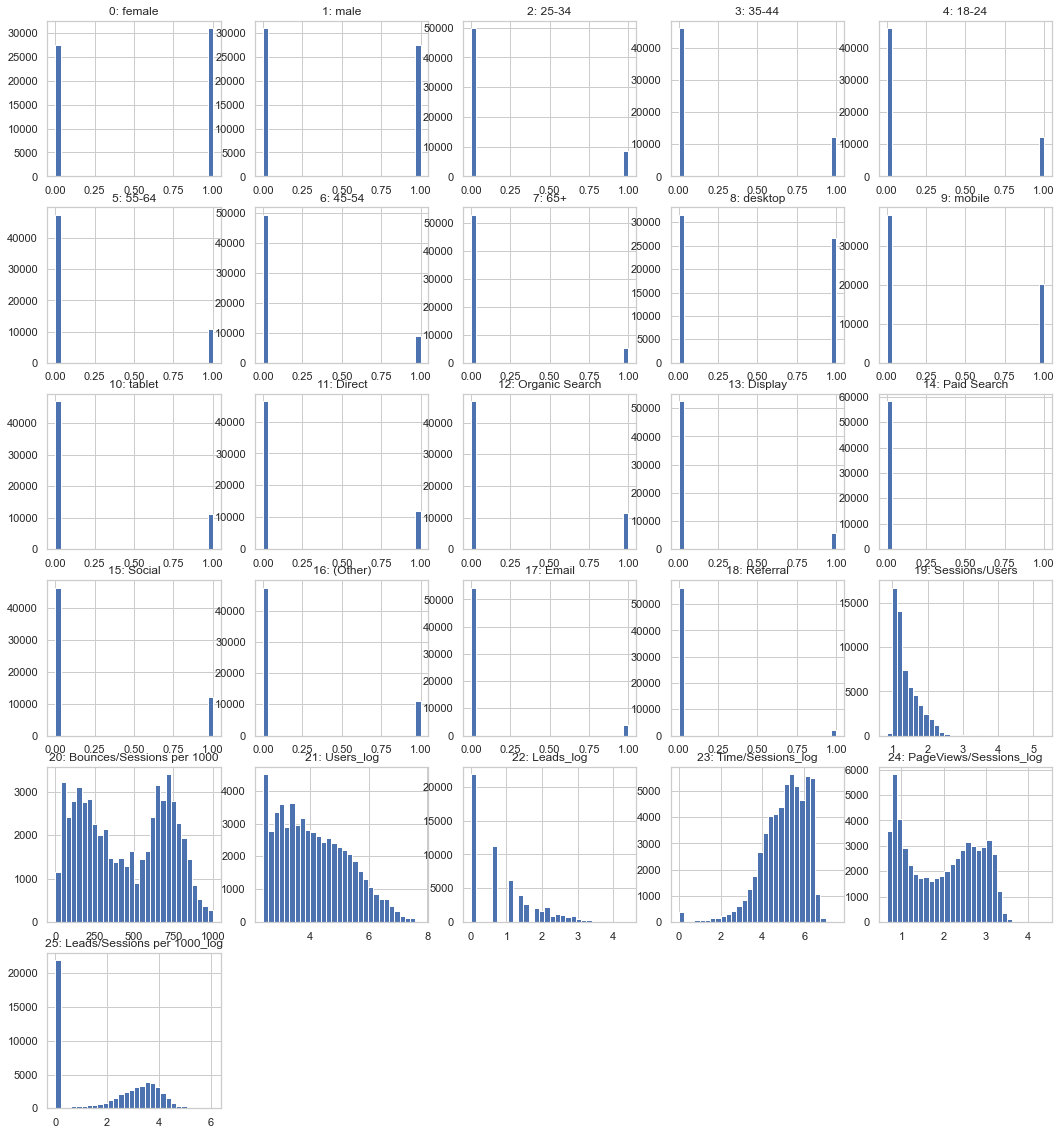

In [35]:
fig, axes = plt.subplots(6, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i >df3.shape[1]-1:
        ax.set_visible(False)
        continue
    ax.hist(df3.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, df3.columns[i]))

# 3. Model Training

The objective of the model is not to perform a regression nor a prediction of the leads, but to get a better understanding of the relationship between the variables and the leads.

In [36]:
lr = LinearRegression(n_jobs=-1)

In [37]:
rf = RandomForestRegressor(n_jobs=-1)

In [38]:
X = df3.drop(columns=['Leads_log', 'male', '65+', 'mobile', 'PageViews/Sessions_log', 'Direct', '45-54', 'Leads/Sessions per 1000_log', 'Social', 'Bounces/Sessions per 1000'])
y = df3['Leads_log']

In [39]:
lr.fit(X, y)
print(lr.score(X,y),
lr.intercept_)

0.6778957306561041 -1.1576200665528764


In [40]:
feature_importance = pd.DataFrame(lr.coef_, index=list(X.columns), columns=['Coefficient'])
feature_importance.sort_values(by='Coefficient', ascending=True, inplace=True)

Text(0.5, 1.0, 'Coefficients')

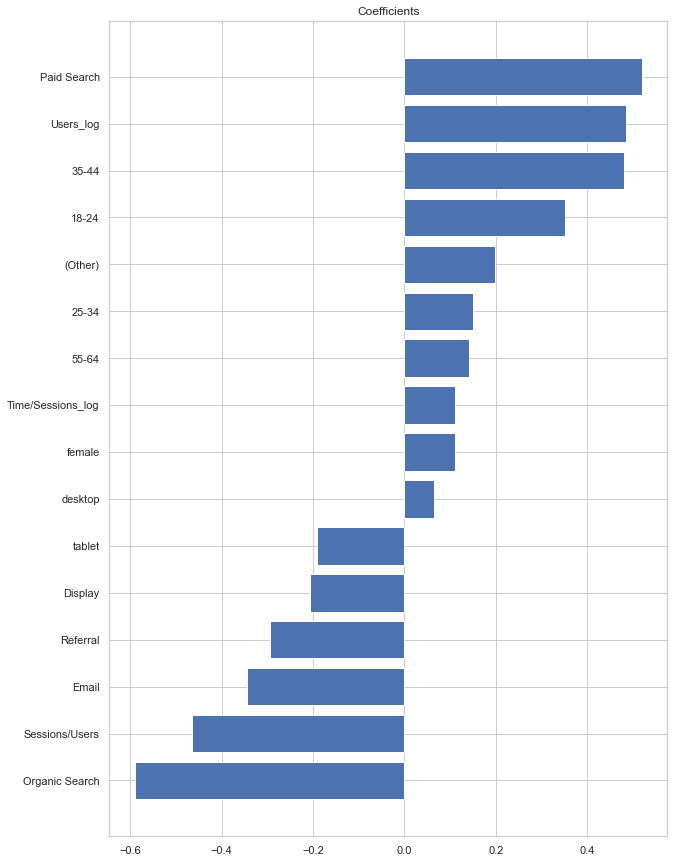

In [41]:
fig, axes = plt.subplots(figsize=(10,15))
plt.barh(feature_importance.index,feature_importance['Coefficient'])

plt.title('Coefficients')

In [42]:
feature_importance

,Coefficient
Organic Search,-0.590777
Sessions/Users,-0.465228
Email,-0.343964
Referral,-0.295366
Display,-0.205978
tablet,-0.190504
desktop,0.065216
female,0.110924
Time/Sessions_log,0.111361
55-64,0.142286


In [43]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Leads_log   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     7666.
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        16:10:02   Log-Likelihood:                -45268.
No. Observations:               58295   AIC:                         9.057e+04
Df Residuals:                   58278   BIC:                         9.072e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1576      0.01